In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 한글 폰트

In [58]:
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/HMFMPYUN.ttf").get_name()
# c:/Windows/Fonts/malgun.ttf
rc('font', family=font_name)

### 투표 Dataset

In [54]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["agree_ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.head(10)

,education,sex,agree,disagree,agree_ratio
0,0,Male,4,2,0.666667
1,1,Male,2,0,1.000000
2,2,Male,4,0,1.000000
3,3,Male,6,3,0.666667
4,4,Male,5,5,0.500000
5,5,Male,13,7,0.650000
6,6,Male,25,9,0.735294
7,7,Male,27,15,0.642857
8,8,Male,75,49,0.604839
9,9,Male,29,29,0.500000


### 얘는 기본적으로 생성되는 건가?

In [56]:
df_wrole_p.head(2)

,education
0,0.00000
1,0.20202


### 참여자 수 : 2871명

In [40]:
df_wrole[['agree', 'disagree']].sum()

agree       1020
disagree    1851
dtype: int64

In [41]:
1020 + 1851

2871

### 상관관계 분석 + 로지스틱 회귀 : statsmodel

In [42]:
model_wrole= sm.Logit.from_formula("agree_ratio~ education + sex", df_wrole) #모델 생성

result_wrole = model_wrole.fit() #로지스틱회귀 결과

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6


In [43]:
result_wrole

In [44]:
result_wrole.summary() #로지스틱 회귀결과 summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            agree_ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Jan 2019   Pseudo R-squ.:                  0.3435
Time:                        14:53:18   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
                                        LLR p-value:                 6.660e-05
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968      0.736     -0.267      0.789      -1.640       1.247
education      -0.2127      0.071     -2.987      0.003      -0.352      -0.073
===============================================================================
"""

In [45]:
print(result_wrole.summary())

                           Logit Regression Results                           
Dep. Variable:            agree_ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Jan 2019   Pseudo R-squ.:                  0.3435
Time:                        14:53:20   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
                                        LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968      0.736     -0.267      0.789      -1.640       1.247
education      -0.2127      0.071     -2.987    

In [46]:
model_wrole2 = sm.Logit.from_formula("agree_ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            agree_ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Jan 2019   Pseudo R-squ.:                  0.3422
Time:                        14:53:20   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
                                        LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

### 시각화

성별 구분(O)

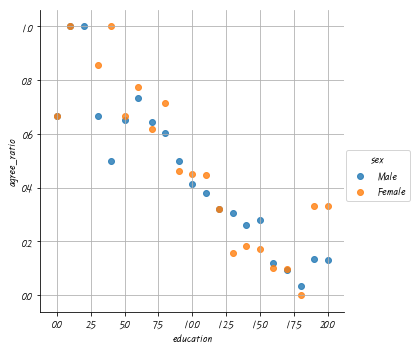

In [47]:
sns.lmplot(x='education', y='agree_ratio', hue='sex', data=df_wrole, fit_reg=False)
plt.rcParams['figure.figsize'] = (10,8)
plt.grid(True)
plt.show()

성별 구분(X)

In [51]:
df_wrole_p.head(2)

,education
0,0.00000
1,0.20202


In [48]:
result_wrole2.predict(df_wrole_p)[0:5]

0    0.873741
1    0.868947
2    0.864000
3    0.858895
4    0.853632
dtype: float64

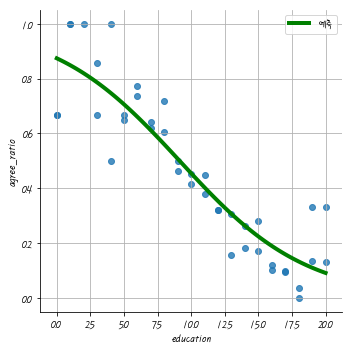

In [67]:
sns.lmplot(x='education', y='agree_ratio', data=df_wrole, fit_reg=False)


xx=np.linspace(0,20,100) # 0~20까지 100등분
bb= range(1,101)

df_wrole_p = pd.DataFrame({"education":xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "g-", lw=4, label="예측")

plt.grid(True)
plt.legend()
plt.show()